# Capstone Crypto DNN Algorithm simulation 

## Getting and Preparing the Data

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

/var/folders/dv/hbz8skm145x_yfp9wff744980000gn/T/ipykernel_2634/1266633243.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [110]:
data = pd.read_csv("ETH_USDT_BinanceDaily.csv", parse_dates = ["Date"], index_col = "Date")

In [111]:
data 

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-01 02:00:00,733.69000,741.76000,733.27000,738.85000,52279.69582
2021-01-01 04:00:00,738.85000,743.33000,732.12000,740.08000,73734.03590
2021-01-01 06:00:00,740.08000,742.67000,733.50000,735.39000,47769.98594
2021-01-01 08:00:00,735.39000,737.73000,726.57000,727.94000,63163.60710
2021-01-01 10:00:00,727.94000,731.80000,714.29000,725.34000,93294.11217
...,...,...,...,...,...
2023-02-27 14:00:00,1627.20000,1636.44000,1624.17000,1633.45000,20092.99890
2023-02-27 16:00:00,1633.45000,1636.23000,1626.79000,1632.10000,28502.98570
2023-02-27 18:00:00,1632.10000,1635.54000,1628.08000,1632.89000,16858.06030


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9451 entries, 2021-01-01 02:00:00 to 2023-02-27 22:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9451 non-null   float64
 1   High    9451 non-null   float64
 2   Low     9451 non-null   float64
 3   Close   9451 non-null   float64
 4   Volume  9451 non-null   float64
dtypes: float64(5)
memory usage: 443.0 KB


In [113]:
symbol = data.columns[3]
symbol

'Close'

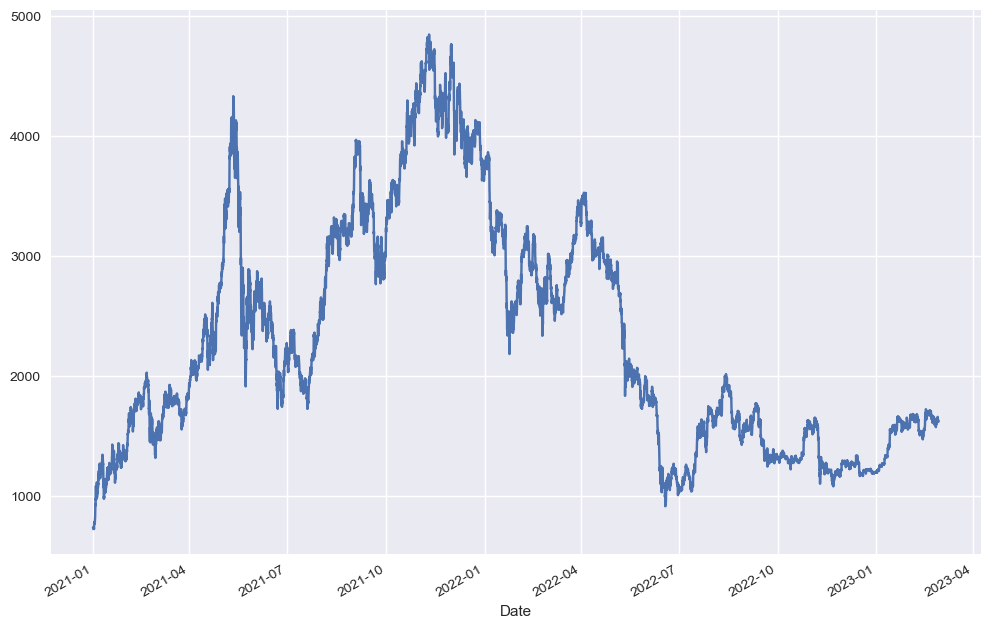

In [114]:
data["Close"].plot(figsize = (12, 8))
plt.show()

In [115]:
data["returns"] = np.log(data[symbol] / data[symbol].shift())

In [116]:
data

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2021-01-01 02:00:00,733.69000,741.76000,733.27000,738.85000,52279.69582,NaN
2021-01-01 04:00:00,738.85000,743.33000,732.12000,740.08000,73734.03590,0.00166
2021-01-01 06:00:00,740.08000,742.67000,733.50000,735.39000,47769.98594,-0.00636
2021-01-01 08:00:00,735.39000,737.73000,726.57000,727.94000,63163.60710,-0.01018
2021-01-01 10:00:00,727.94000,731.80000,714.29000,725.34000,93294.11217,-0.00358
...,...,...,...,...,...,...
2023-02-27 14:00:00,1627.20000,1636.44000,1624.17000,1633.45000,20092.99890,0.00383
2023-02-27 16:00:00,1633.45000,1636.23000,1626.79000,1632.10000,28502.98570,-0.00083
2023-02-27 18:00:00,1632.10000,1635.54000,1628.08000,1632.89000,16858.06030,0.00048


## Adding Features

In [117]:
window = 100

In [118]:
df = data.copy()
df["dir"] = np.where(df["returns"] > 0, 1, 0)
df["sma"] = df[symbol].rolling(window).mean() - df[symbol].rolling(150).mean()
df["boll"] = (df[symbol] - df[symbol].rolling(window).mean()) / df[symbol].rolling(window).std()
df["min"] = df[symbol].rolling(window).min() / df[symbol] - 1
df["max"] = df[symbol].rolling(window).max() / df[symbol] - 1
df["mom"] = df["returns"].rolling(3).mean()
df["vol"] = df["returns"].rolling(window).std()
df.dropna(inplace = True)

In [119]:
df

,Open,High,Low,Close,Volume,returns,dir,sma,boll,min,max,mom,vol
Date,,,,,,,,,,,,,
2021-01-13 12:00:00,1102.02000,1127.87000,1091.25000,1126.84000,134375.79610,0.02222,1,93.82580,-0.37277,-0.13279,0.19334,0.01679,0.02789
2021-01-13 14:00:00,1126.89000,1137.65000,1108.18000,1129.89000,102850.62650,0.00270,1,91.98957,-0.34958,-0.13513,0.19012,0.01687,0.02776
2021-01-13 16:00:00,1129.79000,1147.97000,1114.66000,1114.98000,137920.55880,-0.01328,0,89.82273,-0.52310,-0.12356,0.20603,0.00388,0.02766
2021-01-13 18:00:00,1114.98000,1121.50000,1091.02000,1096.39000,94507.44532,-0.01681,0,87.41667,-0.73359,-0.10870,0.22648,-0.00913,0.02768
2021-01-13 20:00:00,1096.39000,1116.00000,1086.70000,1109.86000,84728.17376,0.01221,1,85.14813,-0.58560,-0.11952,0.21159,-0.00596,0.02768
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27 14:00:00,1627.20000,1636.44000,1624.17000,1633.45000,20092.99890,0.00383,1,-11.71580,-0.30661,-0.03604,0.04917,0.00014,0.00679
2023-02-27 16:00:00,1633.45000,1636.23000,1626.79000,1632.10000,28502.98570,-0.00083,0,-12.58273,-0.33223,-0.03524,0.05004,0.00204,0.00658
2023-02-27 18:00:00,1632.10000,1635.54000,1628.08000,1632.89000,16858.06030,0.00048,1,-13.45777,-0.29704,-0.03571,0.04953,0.00116,0.00658


## Adding Feature lags

In [120]:
lags =5

In [121]:
cols = []
features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

In [122]:
for f in features:
        for lag in range(1, lags + 1):
            col = "{}_lag_{}".format(f, lag)
            df[col] = df[f].shift(lag)
            cols.append(col)
df.dropna(inplace = True)

In [123]:
df

,Open,High,Low,Close,Volume,returns,dir,sma,boll,min,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-13 22:00:00,1109.80000,1162.57000,1106.10000,1148.00000,159393.02310,0.03379,1,82.81480,-0.15864,-0.14877,...,-0.00596,-0.00913,0.00388,0.01687,0.01679,0.02768,0.02768,0.02766,0.02776,0.02789
2021-01-14 00:00:00,1147.85000,1171.74000,1141.78000,1146.15000,135292.45880,-0.00161,0,80.77197,-0.18912,-0.14740,...,0.00973,-0.00596,-0.00913,0.00388,0.01687,0.02784,0.02768,0.02768,0.02766,0.02776
2021-01-14 02:00:00,1146.25000,1174.73000,1144.83000,1166.59000,104146.88600,0.01768,1,78.76510,0.03438,-0.16234,...,0.01480,0.00973,-0.00596,-0.00913,0.00388,0.02771,0.02784,0.02768,0.02768,0.02766
2021-01-14 04:00:00,1166.48000,1196.98000,1147.51000,1193.24000,146154.00320,0.02259,1,76.58700,0.33084,-0.18104,...,0.01662,0.01480,0.00973,-0.00596,-0.00913,0.02776,0.02771,0.02784,0.02768,0.02768
2021-01-14 06:00:00,1193.41000,1220.63000,1187.34000,1212.80000,184099.14440,0.01626,1,74.43303,0.54430,-0.19425,...,0.01288,0.01662,0.01480,0.00973,-0.00596,0.02775,0.02776,0.02771,0.02784,0.02768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27 14:00:00,1627.20000,1636.44000,1624.17000,1633.45000,20092.99890,0.00383,1,-11.71580,-0.30661,-0.03604,...,-0.00348,-0.00773,-0.00172,0.00136,0.00482,0.00685,0.00684,0.00681,0.00678,0.00673
2023-02-27 16:00:00,1633.45000,1636.23000,1626.79000,1632.10000,28502.98570,-0.00083,0,-12.58273,-0.33223,-0.03524,...,0.00014,-0.00348,-0.00773,-0.00172,0.00136,0.00679,0.00685,0.00684,0.00681,0.00678
2023-02-27 18:00:00,1632.10000,1635.54000,1628.08000,1632.89000,16858.06030,0.00048,1,-13.45777,-0.29704,-0.03571,...,0.00204,0.00014,-0.00348,-0.00773,-0.00172,0.00658,0.00679,0.00685,0.00684,0.00681


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9297 entries, 2021-01-13 22:00:00 to 2023-02-27 22:00:00
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        9297 non-null   float64
 1   High        9297 non-null   float64
 2   Low         9297 non-null   float64
 3   Close       9297 non-null   float64
 4   Volume      9297 non-null   float64
 5   returns     9297 non-null   float64
 6   dir         9297 non-null   int64  
 7   sma         9297 non-null   float64
 8   boll        9297 non-null   float64
 9   min         9297 non-null   float64
 10  max         9297 non-null   float64
 11  mom         9297 non-null   float64
 12  vol         9297 non-null   float64
 13  dir_lag_1   9297 non-null   float64
 14  dir_lag_2   9297 non-null   float64
 15  dir_lag_3   9297 non-null   float64
 16  dir_lag_4   9297 non-null   float64
 17  dir_lag_5   9297 non-null   float64
 18  sma_lag_1   9297 non-null   floa

In [125]:
len(cols)

35

## Splitting into Train and Test Set

In [126]:
len(df)

9297

In [127]:
# split = int(len(df)*0.66)
# split

In [128]:
train=df[df.index < pd.to_datetime('2022-07-04 04:00:00')].copy()

In [129]:
train

,Open,High,Low,Close,Volume,returns,dir,sma,boll,min,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-13 22:00:00,1109.80000,1162.57000,1106.10000,1148.00000,159393.02310,0.03379,1,82.81480,-0.15864,-0.14877,...,-0.00596,-0.00913,0.00388,0.01687,0.01679,0.02768,0.02768,0.02766,0.02776,0.02789
2021-01-14 00:00:00,1147.85000,1171.74000,1141.78000,1146.15000,135292.45880,-0.00161,0,80.77197,-0.18912,-0.14740,...,0.00973,-0.00596,-0.00913,0.00388,0.01687,0.02784,0.02768,0.02768,0.02766,0.02776
2021-01-14 02:00:00,1146.25000,1174.73000,1144.83000,1166.59000,104146.88600,0.01768,1,78.76510,0.03438,-0.16234,...,0.01480,0.00973,-0.00596,-0.00913,0.00388,0.02771,0.02784,0.02768,0.02768,0.02766
2021-01-14 04:00:00,1166.48000,1196.98000,1147.51000,1193.24000,146154.00320,0.02259,1,76.58700,0.33084,-0.18104,...,0.01662,0.01480,0.00973,-0.00596,-0.00913,0.02776,0.02771,0.02784,0.02768,0.02768
2021-01-14 06:00:00,1193.41000,1220.63000,1187.34000,1212.80000,184099.14440,0.01626,1,74.43303,0.54430,-0.19425,...,0.01288,0.01662,0.01480,0.00973,-0.00596,0.02775,0.02776,0.02771,0.02784,0.02768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-03 19:00:00,1074.39000,1076.00000,1047.42000,1051.72000,75926.17200,-0.02133,0,-6.37330,-0.95199,-0.04188,...,-0.00101,0.00436,0.00803,0.01106,-0.00025,0.01389,0.01394,0.01399,0.01406,0.01397
2022-07-03 21:00:00,1051.72000,1057.56000,1050.61000,1054.55000,26963.43410,0.00269,1,-7.66317,-0.89770,-0.04445,...,-0.00768,-0.00101,0.00436,0.00803,0.01106,0.01401,0.01389,0.01394,0.01399,0.01406
2022-07-03 23:00:00,1054.55000,1057.76000,1045.37000,1050.83000,35593.56230,-0.00353,0,-9.08780,-0.93043,-0.04107,...,-0.00617,-0.00768,-0.00101,0.00436,0.00803,0.01353,0.01401,0.01389,0.01394,0.01399


In [130]:
test = df[df.index >  pd.to_datetime('2022-07-04 04:00:00')].copy()

In [131]:
test

,Open,High,Low,Close,Volume,returns,dir,sma,boll,min,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-04 05:00:00,1101.00000,1117.16000,1089.00000,1090.31000,202196.55750,-0.00976,0,-12.93433,-0.34769,-0.07579,...,0.01437,0.00537,-0.00739,-0.00617,-0.00768,0.01400,0.01365,0.01353,0.01353,0.01401
2022-07-04 07:00:00,1090.32000,1135.36000,1084.35000,1112.21000,165624.68110,0.01989,1,-14.34567,-0.02224,-0.09399,...,0.01229,0.01437,0.00537,-0.00739,-0.00617,0.01401,0.01400,0.01365,0.01353,0.01353
2022-07-04 09:00:00,1112.20000,1134.00000,1103.38000,1125.87000,106795.56560,0.01221,1,-15.70207,0.19237,-0.10499,...,0.01327,0.01229,0.01437,0.00537,-0.00739,0.01417,0.01401,0.01400,0.01365,0.01353
2022-07-04 11:00:00,1125.87000,1135.30000,1118.65000,1123.47000,67729.91220,-0.00213,0,-17.48610,0.18367,-0.10307,...,0.00745,0.01327,0.01229,0.01437,0.00537,0.01423,0.01417,0.01401,0.01400,0.01365
2022-07-04 13:00:00,1123.46000,1147.00000,1117.54000,1135.28000,64873.27690,0.01046,1,-18.71480,0.37966,-0.11240,...,0.00999,0.00745,0.01327,0.01229,0.01437,0.01401,0.01423,0.01417,0.01401,0.01400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27 14:00:00,1627.20000,1636.44000,1624.17000,1633.45000,20092.99890,0.00383,1,-11.71580,-0.30661,-0.03604,...,-0.00348,-0.00773,-0.00172,0.00136,0.00482,0.00685,0.00684,0.00681,0.00678,0.00673
2023-02-27 16:00:00,1633.45000,1636.23000,1626.79000,1632.10000,28502.98570,-0.00083,0,-12.58273,-0.33223,-0.03524,...,0.00014,-0.00348,-0.00773,-0.00172,0.00136,0.00679,0.00685,0.00684,0.00681,0.00678
2023-02-27 18:00:00,1632.10000,1635.54000,1628.08000,1632.89000,16858.06030,0.00048,1,-13.45777,-0.29704,-0.03571,...,0.00204,0.00014,-0.00348,-0.00773,-0.00172,0.00658,0.00679,0.00685,0.00684,0.00681


In [132]:
# train = df.iloc[:split].copy()
# train

In [133]:
# test = df.iloc[split:].copy()
# test

## Feature Scaling (Standardization)

In [134]:
train[cols]

,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-13 22:00:00,1.00000,0.00000,0.00000,1.00000,1.00000,85.14813,87.41667,89.82273,91.98957,93.82580,...,-0.00596,-0.00913,0.00388,0.01687,0.01679,0.02768,0.02768,0.02766,0.02776,0.02789
2021-01-14 00:00:00,1.00000,1.00000,0.00000,0.00000,1.00000,82.81480,85.14813,87.41667,89.82273,91.98957,...,0.00973,-0.00596,-0.00913,0.00388,0.01687,0.02784,0.02768,0.02768,0.02766,0.02776
2021-01-14 02:00:00,0.00000,1.00000,1.00000,0.00000,0.00000,80.77197,82.81480,85.14813,87.41667,89.82273,...,0.01480,0.00973,-0.00596,-0.00913,0.00388,0.02771,0.02784,0.02768,0.02768,0.02766
2021-01-14 04:00:00,1.00000,0.00000,1.00000,1.00000,0.00000,78.76510,80.77197,82.81480,85.14813,87.41667,...,0.01662,0.01480,0.00973,-0.00596,-0.00913,0.02776,0.02771,0.02784,0.02768,0.02768
2021-01-14 06:00:00,1.00000,1.00000,0.00000,1.00000,1.00000,76.58700,78.76510,80.77197,82.81480,85.14813,...,0.01288,0.01662,0.01480,0.00973,-0.00596,0.02775,0.02776,0.02771,0.02784,0.02768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-03 19:00:00,1.00000,0.00000,0.00000,1.00000,1.00000,-5.61087,-5.12613,-4.47687,-3.78520,-2.86280,...,-0.00101,0.00436,0.00803,0.01106,-0.00025,0.01389,0.01394,0.01399,0.01406,0.01397
2022-07-03 21:00:00,0.00000,1.00000,0.00000,0.00000,1.00000,-6.37330,-5.61087,-5.12613,-4.47687,-3.78520,...,-0.00768,-0.00101,0.00436,0.00803,0.01106,0.01401,0.01389,0.01394,0.01399,0.01406
2022-07-03 23:00:00,1.00000,0.00000,1.00000,0.00000,0.00000,-7.66317,-6.37330,-5.61087,-5.12613,-4.47687,...,-0.00617,-0.00768,-0.00101,0.00436,0.00803,0.01353,0.01401,0.01389,0.01394,0.01399


In [135]:
mu, std = train.mean(), train.std() # train set parameters (mu, std) for standardization

In [136]:
std

Open           913.30456
High           918.17459
Low            907.89407
Close          913.30817
Volume       57358.48946
returns          0.01528
dir              0.49995
sma             93.00226
boll             1.40413
min              0.07346
max              0.12606
mom              0.00860
vol              0.00569
dir_lag_1        0.49995
dir_lag_2        0.49995
dir_lag_3        0.49995
dir_lag_4        0.49995
dir_lag_5        0.49995
sma_lag_1       93.00818
sma_lag_2       93.01445
sma_lag_3       93.02109
sma_lag_4       93.02807
sma_lag_5       93.03536
boll_lag_1       1.40415
boll_lag_2       1.40416
boll_lag_3       1.40412
boll_lag_4       1.40408
boll_lag_5       1.40403
min_lag_1        0.07346
min_lag_2        0.07346
min_lag_3        0.07345
min_lag_4        0.07345
min_lag_5        0.07345
max_lag_1        0.12607
max_lag_2        0.12607
max_lag_3        0.12607
max_lag_4        0.12607
max_lag_5        0.12607
mom_lag_1        0.00860
mom_lag_2        0.00860


In [137]:
train_s = (train - mu) / std # standardization of train set features

In [138]:
train_s

,Open,High,Low,Close,Volume,returns,dir,sma,boll,min,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-13 22:00:00,-1.78288,-1.74549,-1.76463,-1.74104,1.65404,2.21121,0.98098,0.88853,-0.16492,-0.62798,...,-0.69219,-1.06031,0.45193,1.96083,1.95054,2.33907,2.33860,2.33363,2.34877,2.37110
2021-01-14 00:00:00,-1.74122,-1.73550,-1.72533,-1.74307,1.23387,-0.10546,-1.01923,0.86656,-0.18663,-0.60928,...,1.13187,-0.69189,-1.06055,0.45140,1.95993,2.36700,2.33770,2.33722,2.33224,2.34737
2021-01-14 02:00:00,-1.74297,-1.73225,-1.72197,-1.72069,0.69087,1.15687,0.98098,0.84498,-0.02746,-0.81264,...,1.72091,1.13207,-0.69212,-1.06070,0.45085,2.34537,2.36561,2.33633,2.33584,2.33085
2021-01-14 04:00:00,-1.72082,-1.70802,-1.71902,-1.69151,1.42323,1.47825,0.98098,0.82156,0.18368,-1.06732,...,1.93271,1.72107,1.13191,-0.69236,-1.06089,2.35432,2.34400,2.36423,2.33494,2.33444
2021-01-14 06:00:00,-1.69133,-1.68226,-1.67515,-1.67009,2.08477,1.06414,0.98098,0.79840,0.33570,-1.24712,...,1.49869,1.93286,1.72094,1.13120,-0.69264,2.35202,2.35294,2.34262,2.36283,2.33354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-03 19:00:00,-1.82165,-1.83978,-1.82927,-1.84646,0.19886,-1.39555,-1.01923,-0.07046,-0.72993,0.82708,...,-0.11612,0.50803,0.93425,1.28637,-0.02836,-0.08335,-0.07532,-0.06635,-0.05545,-0.07211
2022-07-03 21:00:00,-1.84647,-1.85986,-1.82575,-1.84336,-0.65476,0.17594,0.98098,-0.08433,-0.69127,0.79208,...,-0.89143,-0.11585,0.50785,0.93359,1.28562,-0.06259,-0.08369,-0.07567,-0.06671,-0.05581
2022-07-03 23:00:00,-1.84337,-1.85964,-1.83152,-1.84744,-0.50430,-0.23118,-1.01923,-0.09965,-0.71458,0.83813,...,-0.71666,-0.89112,-0.11606,0.50730,0.93293,-0.14706,-0.06295,-0.08404,-0.07603,-0.06706


In [139]:
train_s.describe()

,Open,High,Low,Close,Volume,returns,dir,sma,boll,min,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,...,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000,6431.00000
mean,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,...,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.99600,-1.96151,-2.01195,-1.99599,-1.12203,-7.72412,-1.01923,-4.14701,-3.40032,-3.43541,...,-6.96791,-6.96725,-6.96774,-6.96635,-6.96516,-1.39542,-1.39521,-1.39501,-1.39480,-1.39457
25%,-0.83328,-0.83716,-0.82636,-0.83328,-0.61467,-0.44195,-1.01923,-0.57570,-0.81010,-0.75816,...,-0.44561,-0.44569,-0.44554,-0.44573,-0.44595,-0.65550,-0.65560,-0.65571,-0.65582,-0.65591
50%,-0.00583,-0.00635,-0.01727,-0.00582,-0.29157,0.01264,0.98098,0.06892,0.03911,0.17878,...,0.02222,0.02238,0.02228,0.02186,0.02142,-0.26858,-0.26885,-0.26912,-0.26940,-0.26966
75%,0.66711,0.67828,0.67119,0.66711,0.26403,0.47209,0.98098,0.67664,0.82157,0.83976,...,0.50074,0.50058,0.50040,0.50024,0.50017,0.40784,0.40926,0.40962,0.40993,0.41280
max,2.30901,2.29016,2.33055,2.30875,15.10100,6.22670,0.98098,2.74470,2.61724,1.39725,...,5.75327,5.75321,5.75324,5.75134,5.74955,4.44128,4.43901,4.43675,4.43447,4.43215


## Creating and Fitting the DNN Model

In [140]:
from DNNModel import *

In [141]:
# fitting a DNN model with 5 Hidden Layers (100 nodes each) and dropout regularization

set_seeds(100)
model = create_model(hl = 5, hu = 100, dropout = True, input_dim = len(cols))
model.fit(x = train_s[cols], y = train["dir"], epochs = 50, verbose = False,
          validation_split = 0.05, shuffle = False, class_weight = cw(train))

In [142]:
model.evaluate(train_s[cols], train["dir"]) # evaluate the fit on the train set

201/201 [==============================] - 0s 510us/step - loss: 0.6856 - accuracy: 0.5534


[0.6855589747428894, 0.5534131526947021]

In [143]:
pred = model.predict(train_s[cols]) # prediction (probabilities)
pred

201/201 [==============================] - 0s 459us/step


array([[0.5327858 ],
       [0.4904463 ],
       [0.49409217],
       ...,
       [0.50417125],
       [0.5464128 ],
       [0.5005741 ]], dtype=float32)

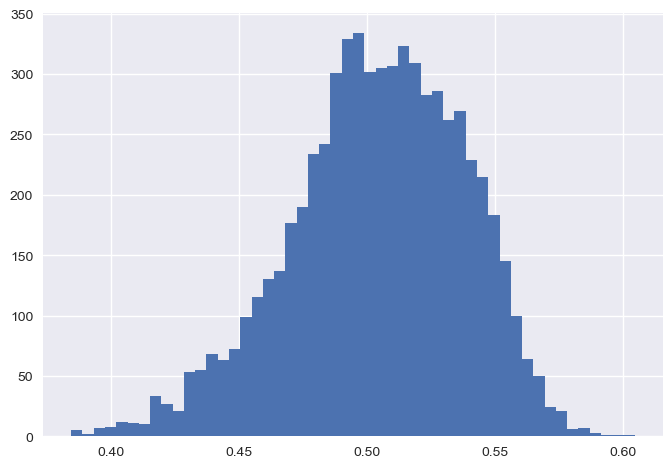

In [144]:
plt.hist(pred, bins = 50)
plt.show()

## Prediction and Forward Testing

In [145]:
test

,Open,High,Low,Close,Volume,returns,dir,sma,boll,min,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-04 05:00:00,1101.00000,1117.16000,1089.00000,1090.31000,202196.55750,-0.00976,0,-12.93433,-0.34769,-0.07579,...,0.01437,0.00537,-0.00739,-0.00617,-0.00768,0.01400,0.01365,0.01353,0.01353,0.01401
2022-07-04 07:00:00,1090.32000,1135.36000,1084.35000,1112.21000,165624.68110,0.01989,1,-14.34567,-0.02224,-0.09399,...,0.01229,0.01437,0.00537,-0.00739,-0.00617,0.01401,0.01400,0.01365,0.01353,0.01353
2022-07-04 09:00:00,1112.20000,1134.00000,1103.38000,1125.87000,106795.56560,0.01221,1,-15.70207,0.19237,-0.10499,...,0.01327,0.01229,0.01437,0.00537,-0.00739,0.01417,0.01401,0.01400,0.01365,0.01353
2022-07-04 11:00:00,1125.87000,1135.30000,1118.65000,1123.47000,67729.91220,-0.00213,0,-17.48610,0.18367,-0.10307,...,0.00745,0.01327,0.01229,0.01437,0.00537,0.01423,0.01417,0.01401,0.01400,0.01365
2022-07-04 13:00:00,1123.46000,1147.00000,1117.54000,1135.28000,64873.27690,0.01046,1,-18.71480,0.37966,-0.11240,...,0.00999,0.00745,0.01327,0.01229,0.01437,0.01401,0.01423,0.01417,0.01401,0.01400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27 14:00:00,1627.20000,1636.44000,1624.17000,1633.45000,20092.99890,0.00383,1,-11.71580,-0.30661,-0.03604,...,-0.00348,-0.00773,-0.00172,0.00136,0.00482,0.00685,0.00684,0.00681,0.00678,0.00673
2023-02-27 16:00:00,1633.45000,1636.23000,1626.79000,1632.10000,28502.98570,-0.00083,0,-12.58273,-0.33223,-0.03524,...,0.00014,-0.00348,-0.00773,-0.00172,0.00136,0.00679,0.00685,0.00684,0.00681,0.00678
2023-02-27 18:00:00,1632.10000,1635.54000,1628.08000,1632.89000,16858.06030,0.00048,1,-13.45777,-0.29704,-0.03571,...,0.00204,0.00014,-0.00348,-0.00773,-0.00172,0.00658,0.00679,0.00685,0.00684,0.00681


In [146]:
test_s = (test - mu) / std # standardization of test set features (with train set parameters!!!)

In [147]:
model.evaluate(test_s[cols], test["dir"])

90/90 [==============================] - 0s 579us/step - loss: 0.6879 - accuracy: 0.5488


[0.6879286766052246, 0.548848569393158]

In [148]:
pred = model.predict(test_s[cols])
pred

90/90 [==============================] - 0s 479us/step


array([[0.47897735],
       [0.5223295 ],
       [0.48503706],
       ...,
       [0.54927737],
       [0.49455902],
       [0.52870125]], dtype=float32)

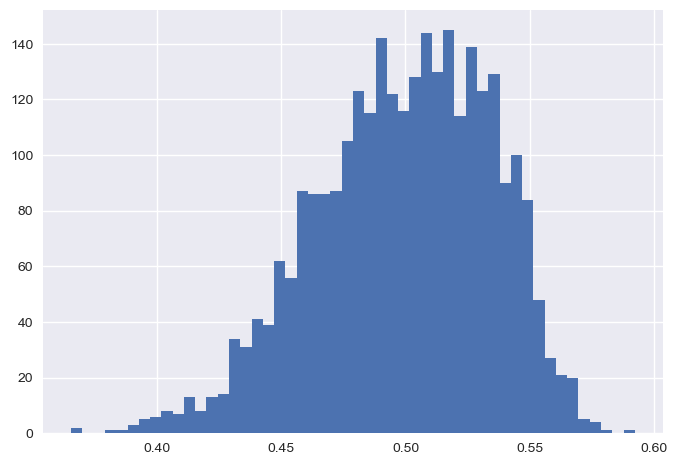

In [149]:
plt.hist(pred, bins = 50);

In [150]:
test["proba"] = model.predict(test_s[cols])

90/90 [==============================] - 0s 485us/step


In [151]:
test["position"] = np.where(test.proba < 0.49, -1, np.nan) # 1. short where proba < 0.49

In [152]:
test["position"] = np.where(test.proba > 0.50, 1, test.position) # 2. long where proba > 0.50

In [153]:
test["position"] = test.position.fillna(0)

In [154]:
test.position.value_counts(dropna = False)

1.00000     1493
-1.00000    1098
0.00000      275
Name: position, dtype: int64

In [155]:
test["strategy"] = test["position"] * test["returns"]

In [156]:
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

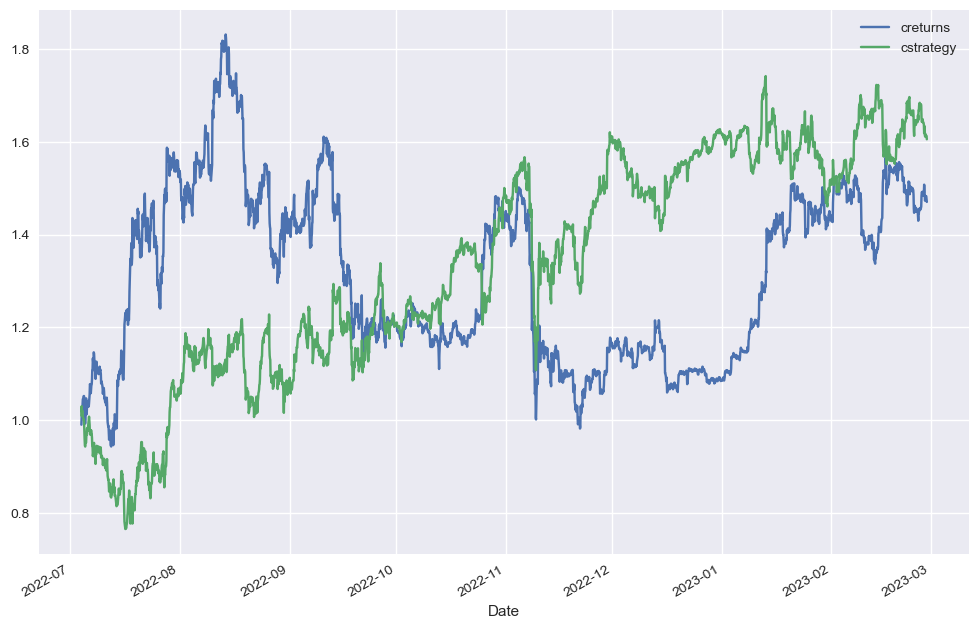

In [157]:
test[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [158]:
test["ROIreturns"]=np.cumprod(test["returns"]+1)-1
test["ROIstrategy"]=np.cumprod(test["strategy"]+1)-1


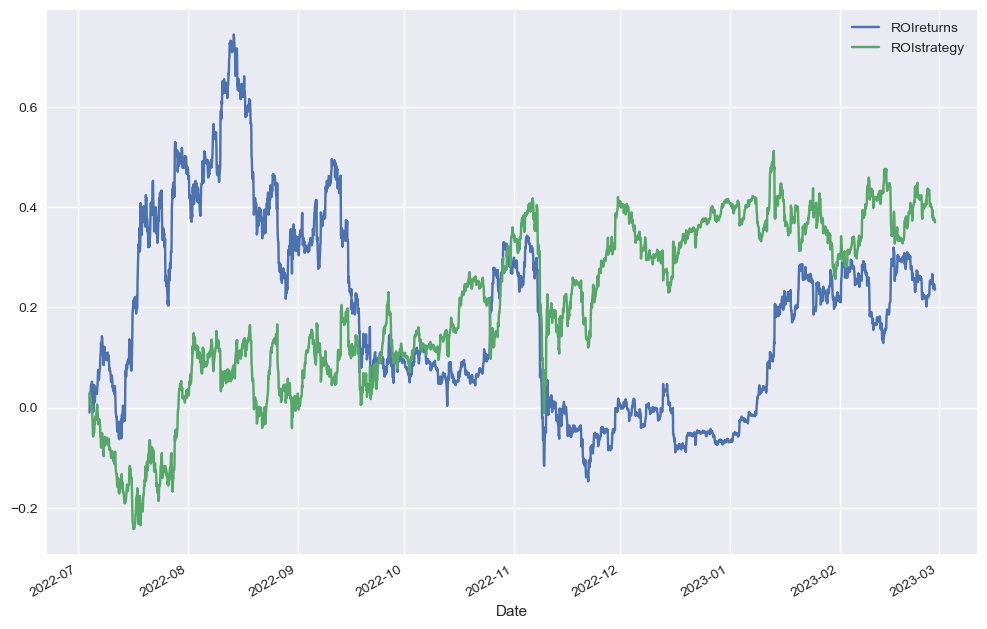

In [159]:
test[["ROIreturns", "ROIstrategy"]].plot(figsize = (12, 8))
plt.show()

In [160]:
test["ROIstrategy"][-1]

0.3696436192933401

In [161]:
test["ROIreturns"][-1]

0.23522596424656905